# Bibliotecas

In [ ]:
from sklearn import preprocessing
from sklearn import utils
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import pickle
from sklearn import tree

# Importando os Dados

In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

## 2023

Conectando ao Google Colab:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importando os dados apontados em 2023

#df_23 = pd.read_excel('/content/drive/Shareddrives/Otimizador/01_Otimizador/Dados/recomendacao_setembro.xlsx')

In [ ]:
df_23 = pd.read_excel('/content/drive/Shareddrives/Otimizador/01_Otimizador/Classificador_5/recomendacao_ajustada4.xlsx')

In [ ]:
df_23


,Chave,Material,Grupo
0,R409009A,32864,2
1,R409011D,AEC 0144,1
2,R403027A,32864,2
3,R409015C,32864,2
4,R409010D,32864,2
...,...,...,...
1073,R442005A,32864,2
1074,R442020A,32864,2
1075,120066B,32864,2
1076,R442008A,32864,2


In [ ]:
df_23 = df_23[['Chave','Grupo']] #Criadas as colunas chave e target

In [ ]:
df_23['target'] = df_23['Grupo']

In [ ]:
df_23.drop('Grupo',axis=1).inplace=True

## Erwinia Ocorrência

In [ ]:
df_oc_erwinia = pd.read_excel('/content/drive/Shareddrives/Otimizador/01_Otimizador/geral.xlsx',
                              'erwinia')

In [ ]:
df_oc_erwinia['chave'] = df_oc_erwinia['CHAVE']
df_oc_erwinia.drop('CHAVE',axis=1,inplace=True)

## Erwinia Suscetibilidade

In [ ]:
df_s_erwinia = pd.read_excel('/content/drive/Shareddrives/Otimizador/01_Otimizador/geral.xlsx', 'erwinia_s')

## Geada

In [ ]:
#df_geada = pd.read_excel('/content/drive/Shareddrives/Otimizador/01_Otimizador/geral.xlsx', 'geada')


In [ ]:
#df_geada['GEADA'] = round(df_geada['GEADA'])

In [ ]:
#df_geada = pd.read_excel('/content/drive/Shareddrives/Otimizador/01_Otimizador/Dados/TALHAO_GEADA.xlsx', 'Planilha2',skiprows=1)


In [ ]:
df_geada = pd.read_excel('/content/drive/Shareddrives/Otimizador/01_Otimizador/Classificador_5/GEADA_10_2023.xlsx', 'Geada')


In [ ]:
df_geada2 = pd.melt(df_geada, id_vars=['CD_USO_SOL','Grand Total'])

In [ ]:
df_geada2.drop(['Grand Total'], axis=1, inplace=True)

In [ ]:
df_geada2

,CD_USO_SOL,variable,value
0,3,1,NaN
1,9,1,NaN
2,10,1,NaN
3,69,1,4.713553
4,81,1,NaN
...,...,...,...
91891,324524,chave,NaN
91892,324525,chave,NaN
91893,324536,chave,NaN
91894,324538,chave,NaN


In [ ]:
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()

In [ ]:
#df_geada2['variable'] = df_geada2['variable'].astype('float')

In [ ]:
df_geada2 = df_geada2.groupby('CD_USO_SOL').apply(w_avg, 'variable', 'value')

In [ ]:
df_geada2 = df_geada2.to_frame()

In [ ]:
df_geada2 = df_geada2.reset_index()

In [ ]:
df_geada2.rename(columns={0:'geada'}, inplace=True)

<Axes: >

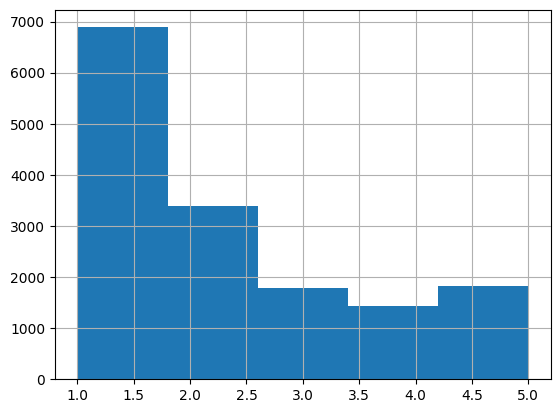

In [ ]:
df_geada2['geada'].hist(bins=5)

## Histórico Dano Geada

In [ ]:
df_dano_geada = pd.read_excel('/content/drive/Shareddrives/Otimizador/01_Otimizador/Dados/dano_geada.xlsx')

In [ ]:
df_dano_geada

,chave,Causador do dano
0,R442022A,1
1,G979010B,1
2,668013A,1
3,668025A,1
4,668017A,1
...,...,...
3081,624002A,1
3082,624003A,1
3083,624004A,1
3084,624005A,1


## Slope & ITW

In [ ]:
#df_slope = pd.read_csv('/content/drive/Shareddrives/Otimizador/01_Otimizador/Preparo_Ajustado.csv')

## ITW NOVO


In [ ]:
df_itw = pd.read_csv('/content/drive/Shareddrives/Otimizador/01_Otimizador/Dados/ITW_NOVO.csv')

In [ ]:
df_itw['CAMALHAO'].replace({"Classe 2":2, "Classe 1":1, "Classe 3":3}, inplace=True)

In [ ]:
df_itw['chave'] = df_itw['ID_PROJETO'] + df_itw['CD_TALHAO']

In [ ]:
df_itw = df_itw[['chave','CAMALHAO']]

## Classe

In [ ]:
df_solo = pd.read_excel("/content/drive/Shareddrives/Otimizador/01_Otimizador/Dados/Legenda Solos 2020.xlsx", "1")

## Produtividade

In [ ]:
df_prod = pd.read_excel('/content/drive/Shareddrives/Otimizador/01_Otimizador/Dados/produtividades_clones_simulado.xlsx','2')

In [ ]:
df_prod = pd.melt(df_prod, id_vars=['Clone'])
df_prod.rename(columns={"variable": "Classes", "value":"Prod", "Clone":"target"}, inplace=True)

In [ ]:
df_solo

,Tipo de solo,Classes
0,NV1,1
1,RQO1,4
2,GM1,5
3,GM2,5
4,SGD1,5
...,...,...
73,LVD1,2
74,LVd4,3
75,RQG1,4
76,RQO2,4


## Cadastro

In [ ]:
df_cadastro = pd.read_csv('/content/drive/Shareddrives/Otimizador/01_Otimizador/Dados/_VW_dCADASTRO__202301181047.csv')

<ipython-input-38-56c5bb6df913>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cadastro = pd.read_csv('/content/drive/Shareddrives/Otimizador/01_Otimizador/Dados/_VW_dCADASTRO__202301181047.csv')


In [ ]:
df_cadastro = df_cadastro.loc[lambda df_cadastro: (df_cadastro['TIP_REG'] == "A") & (df_cadastro['EST_REG'] == "A")]

In [ ]:
df_cadastro['chave'] = df_cadastro['ID_PROJETO'].astype(str) + df_cadastro['CD_TALHAO']

In [ ]:
df_cadastro = df_cadastro.drop(['CD_USUARIO','ID_REGIAO','REGIAO_ADM',
                  'USO_SOLO_DETALHE','USO_SOLO_GRUPO','ESPACAMENTO','NUM_CICLO','NUM_ROTACAO','REGIME','DATA_PLANTIO',
                  'VLR_ENTRELINHA','VLR_ENTREPLANTA','NUM_ARV_HA','GENERO','ESPECIE','CD_MATERIAL_GENETICO',
                  'MATERIAL_GENETICO','VLR_RENDIMENTO','TIPO_PROPRIEDADE','PROJETO_INVESTIMENTO',
                  'BACIA_HIDROGRAFICA','CD_PLANO_OPERACAO','CD_USO_SOLO_PAI','DATA_REG','EST_REG','PROJETO','TIP_REG','VLR_AREA','MUNICIPIO'],
                 axis=1)

# Agrupando Dados

In [ ]:
df_geada2

,CD_USO_SOL,geada
0,3,3.866482
1,9,3.291048
2,10,2.585165
3,69,2.212990
4,81,2.000000
...,...,...
15311,324524,2.000000
15312,324525,3.946217
15313,324536,1.000000
15314,324538,2.000000


## Grupos


In [ ]:
df_grupos = pd.read_excel('/content/drive/Shareddrives/Otimizador/01_Otimizador/classificador_4/Dados/GRUPOS_2023_Otimizador.xlsx')

In [ ]:
df_grupos

,Id,Material Genetico,Espécie,GRUPO,Ordem,Target
0,3795,AEC 0144,UROPHYLLA,TROPICAIS,1,1
1,3405,032864,SALIGNA,SALIGNAS,1,2
2,3997,43178,SALIGNA,SALIGNAS,2,2
3,3955,43046,SALIGNA,SALIGNAS,3,2
4,3751,037254,GLOBULUS X UROPHYLLA,HÍBRIDOS,1,3
5,3890,37409,UROPHYLLA X MAIDENII,HÍBRIDOS,2,3
6,3689,037036,UROPHYLLA X DUNNII,HÍBRIDOS,3,3
7,3693,K1103,DUNNI,SUBTROPICAIS,1,4
8,4595,42285,DUNNI,SUBTROPICAIS,2,4
9,3685,EBC06CAN,BENTHAMII,BENTHAMIIS,1,5


### 23

In [ ]:
df_23['chave'] = df_23['Chave']
df_23.drop('Chave',axis=1).inplace=True

In [ ]:
# Agrupando os dados de 2023

df_23 = pd.merge(df_23, df_cadastro, on='chave', how='inner')

In [ ]:
#df_23 = pd.merge(df_23, df_dano_geada, on='chave', how='left').fillna(0)

In [ ]:
#df_23 = pd.merge(df_23, df_oc_erwinia, on='chave', how='left').fillna(0)

In [ ]:
#df_23 = pd.merge(df_23, df_s_erwinia, left_on='target', right_on='Clone', how='left').fillna(0)

In [ ]:
df_23 = pd.merge(df_23, df_geada2, left_on='CD_USO_SOLO', right_on='CD_USO_SOL', how='inner')#.fillna(0)

In [ ]:
#df_23 = pd.merge(df_23, df_slope, on='chave', how='left').fillna(0)

In [ ]:
df_23 = pd.merge(df_23, df_solo, left_on= 'TIPO_SOLO', right_on='Tipo de solo', how='left').fillna(method='ffill')

In [ ]:
#df_23 = pd.merge(df_23, df_prod, on=['target','Classes'], how='left').fillna(method='bfill')

In [ ]:
df_23 = pd.merge(df_23, df_itw, left_on='chave', right_on='chave', how='inner')#.fillna(0)

In [ ]:
#df_23 = pd.merge(df_23, df_grupos, left_on='target', right_on='Material Genetico', how='left').fillna(0)

In [ ]:
df_23.describe(include='all')

,Chave,Grupo,target,chave,CD_USO_SOLO,DIVISAO_OPERACIONAL,ID_PROJETO,CD_TALHAO,CD_TIP_SOLO,TIPO_SOLO,TIPOLOGIA,BIOMA,CD_USO_SOL,geada,Tipo de solo,Classes,CAMALHAO
count,1073,1073.000000,1073.000000,1073,1073.000000,1073,1073,1073,1073.000000,1073,1073,1073,1073.000000,1073.000000,1073,1073.000000,1073.000000
unique,1068,NaN,NaN,1068,NaN,6,88,282,NaN,45,5,2,NaN,NaN,43,NaN,NaN
top,R478016A,NaN,NaN,R478016A,NaN,PELOTAS,R448,001A,NaN,RRD1,EPQ - Estepe Parque,PAMPA,NaN,NaN,RRD1,NaN,NaN
freq,2,NaN,NaN,2,NaN,538,54,40,NaN,273,404,1026,NaN,NaN,282,NaN,NaN
mean,NaN,2.556384,2.556384,NaN,282086.108108,NaN,NaN,NaN,68.972973,NaN,NaN,NaN,282086.108108,2.406305,NaN,2.667288,1.531221
std,NaN,0.998524,0.998524,NaN,18047.788042,NaN,NaN,NaN,28.132221,NaN,NaN,NaN,18047.788042,1.271752,NaN,1.070387,0.821359
min,NaN,1.000000,1.000000,NaN,255892.000000,NaN,NaN,NaN,38.000000,NaN,NaN,NaN,255892.000000,1.000000,NaN,1.000000,1.000000
25%,NaN,2.000000,2.000000,NaN,263632.000000,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,263632.000000,1.188176,NaN,2.000000,1.000000
50%,NaN,2.000000,2.000000,NaN,284796.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,284796.000000,2.000000,NaN,3.000000,1.000000
75%,NaN,3.000000,3.000000,NaN,297499.000000,NaN,NaN,NaN,76.000000,NaN,NaN,NaN,297499.000000,3.226242,NaN,3.000000,2.000000


## Removendo colunas desnecessárias

In [ ]:
df_chave = df_23[['chave', 'ID_PROJETO', 'CD_TALHAO']]

In [ ]:
df_val = df_23 ##validação

In [ ]:
df_23 = df_23.drop(['ID_PROJETO','CD_USO_SOLO','chave', 'CD_TALHAO', 'CD_USO_SOL',
              'BIOMA', 'DIVISAO_OPERACIONAL', 'TIPO_SOLO'], axis=1)


In [ ]:
df_chave.loc[df_chave.index == 2025]

,chave,ID_PROJETO,CD_TALHAO


In [ ]:
df_23

,Chave,Grupo,target,CD_TIP_SOLO,TIPOLOGIA,geada,Tipo de solo,Classes,CAMALHAO
0,R409009A,2,2,57.0,EGL Estepe Gramineo-Lenhosa,1.0,CXBD3,3.0,1
1,R409011D,1,1,57.0,EGL Estepe Gramineo-Lenhosa,1.0,CXBD3,3.0,3
2,R403027A,2,2,83.0,EGL Estepe Gramineo-Lenhosa,1.0,MT2,2.0,2
3,R409015C,2,2,61.0,EGL Estepe Gramineo-Lenhosa,1.0,RLD2,4.0,1
4,R409010D,2,2,57.0,EGL Estepe Gramineo-Lenhosa,1.0,CXBD3,3.0,1
...,...,...,...,...,...,...,...,...,...
1068,R442005A,2,2,70.0,EGL Estepe Gramineo-Lenhosa,1.0,TX1,3.0,1
1069,R442020A,2,2,60.0,EGL Estepe Gramineo-Lenhosa,1.0,RRD1,3.0,2
1070,120066B,2,2,181.0,EGL Estepe Gramineo-Lenhosa,2.0,TX3,3.0,1
1071,R442008A,2,2,70.0,EGL Estepe Gramineo-Lenhosa,1.0,TX1,3.0,1


# One Hot Encoding

### Regional

### Tipologia

In [ ]:
#ls = ['CD_TIP_SOLO','TIPOLOGIA','Classes']

In [ ]:
#df_23[ls] = df_23[ls].astype('category')

In [ ]:
#dummies = pd.get_dummies(df_23[ls])

In [ ]:
#dummies = pd.get_dummies(df_23[ls])
#df_23 =  pd.concat([df_23,dummies],axis=1)
#df_23.drop(['CD_TIP_SOLO', 'TIPOLOGIA', 'Classes','Classes_1.0','TIPOLOGIA_FES - Floresta Estacional Semidecidual',
            #'TIPOLOGIA_FES - Floresta Estacional Semidecidual'], axis=1, inplace=True)


In [ ]:
#df_23['target'] = df_23['target'].astype(str)

In [ ]:
enc = OrdinalEncoder()
df_23['TIPOLOGIA'] = df_23['TIPOLOGIA'].astype(str)
df_23['TIPOLOGIA'] = enc.fit_transform(df_23[['TIPOLOGIA']])

In [ ]:
# = OrdinalEncoder()
#df_23['target'] = df_23['target'].astype(str)
#df_23['target'] = enc.fit_transform(df_23[['target']])

In [ ]:
df_23['target'] = df_23['target'].astype(str)
df_23[['CD_TIP_SOLO', 'TIPOLOGIA','geada']] = df_23[['CD_TIP_SOLO', 'TIPOLOGIA','geada']].astype(float)

# Split e Conversão

In [ ]:
df_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073 entries, 0 to 1072
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Chave         1073 non-null   object 
 1   Grupo         1073 non-null   int64  
 2   target        1073 non-null   object 
 3   CD_TIP_SOLO   1073 non-null   float64
 4   TIPOLOGIA     1073 non-null   float64
 5   geada         1073 non-null   float64
 6   Tipo de solo  1073 non-null   object 
 7   Classes       1073 non-null   float64
 8   CAMALHAO      1073 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 83.8+ KB


In [ ]:
df_23 = df_23.drop(['Chave', 'Grupo', "CD_TIP_SOLO","TIPOLOGIA", "Tipo de solo"],axis=1)

In [ ]:
X2 = df_23.drop(['target'], axis=1)
y2 = df_23['target']
lab = preprocessing.LabelEncoder()
y_transformed_2 = lab.fit_transform(y2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5, random_state=42)

In [ ]:
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (536, 3)
Shape y_train: (536,)
Shape X_test: (537, 3)
Shape y_test: (537,)


## Acuracia

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

# Modelos

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    splitter='best'
)

In [ ]:
clf_dt = DecisionTreeClassifier()

In [ ]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf_dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)*100

99.81378026070763

In [ ]:
#H = lab.inverse_transform(y_test)
#H = y_pred
rh = pd.DataFrame()
#rh['mat'] = H
rh['prev'] = y_test
rh['pred'] = y_pred

In [ ]:
rh

,prev,pred
992,3,3
746,2,2
1067,2,2
425,5,5
490,2,2
...,...,...
940,2,2
61,4,4
272,2,2
991,2,2


In [ ]:
h = pd.DataFrame()
h[['prev','val']] = rh[['prev','pred']]
df2 = h.pivot_table(columns= ['prev'], aggfunc ='size')
df2 = df2.to_frame()
h = h.drop_duplicates().sort_values(by='val').reset_index(drop=True)
df2 = pd.merge(df2, h, on='prev', how='left').dropna(axis=0)
df2.rename(columns={0 : 'count'}, inplace=True)
df2

,prev,count,val
0,1,29,1
1,2,317,2
2,3,59,3
3,4,98,4
4,5,34,4
5,5,34,5


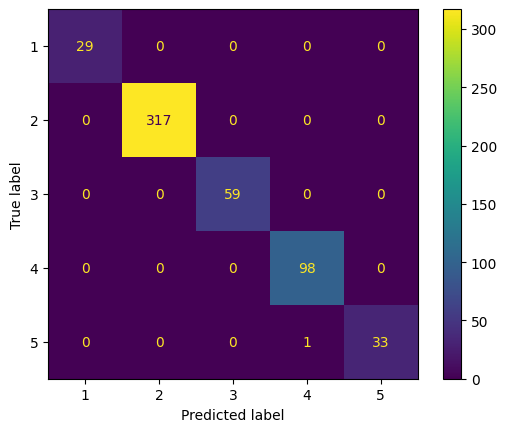

<Figure size 1000x700 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay.from_estimator(
    clf_dt, X_test, y_test)
plt.figure(figsize = (10,7))
plt.show()

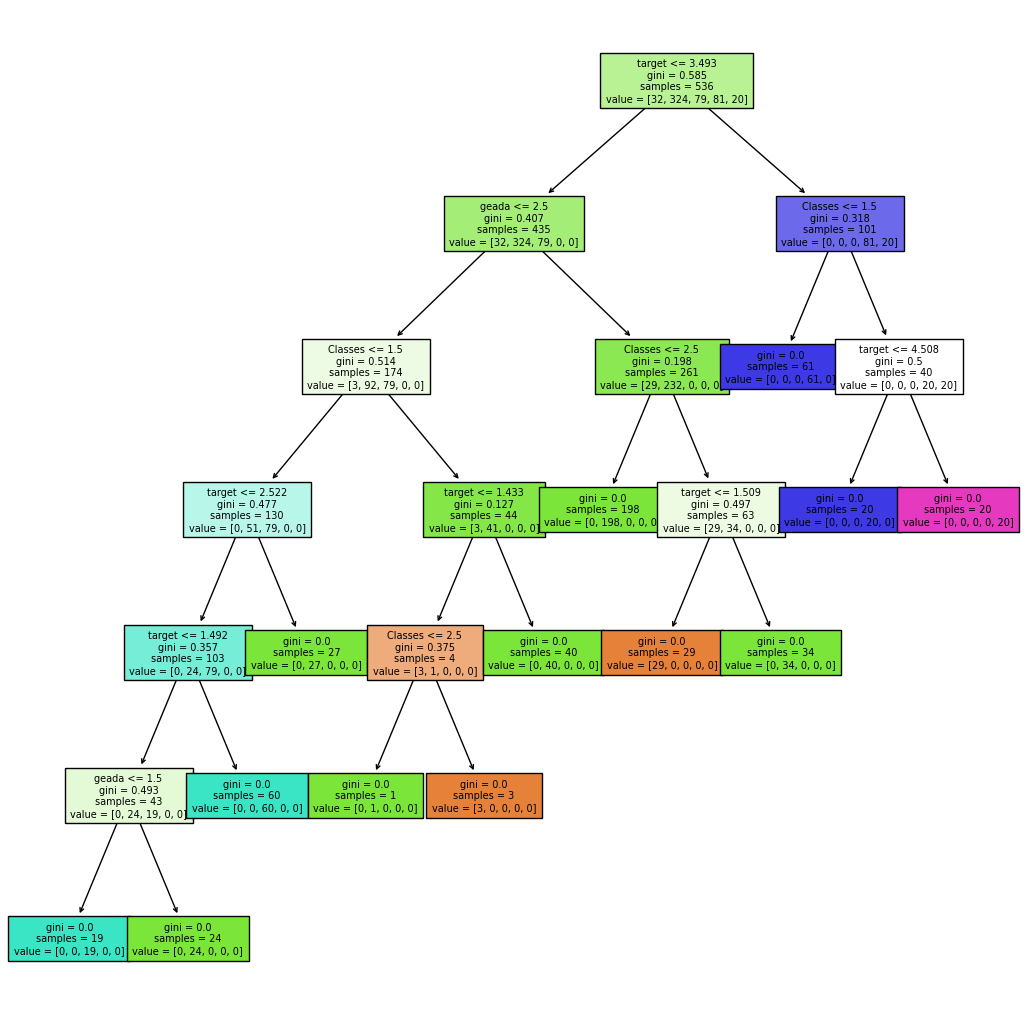

In [ ]:
fig = plt.figure(figsize=(13,13))
_ = tree.plot_tree(clf_dt,feature_names = df_23.columns, fontsize=7,
                   filled=True)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
importances = clf_dt.feature_importances_

Feature 1: geada - Importance: 0.6400409559143351
Feature 2: Classes - Importance: 0.18236664784713677
Feature 3: CAMALHAO - Importance: 0.1775923962385282


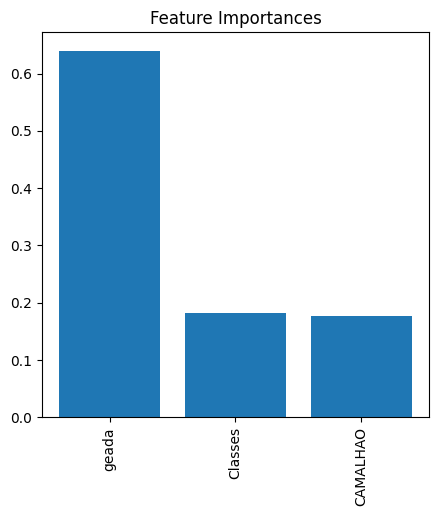

In [ ]:
indices = np.argsort(importances)[::-1]

# Print feature importances
for i in range(X_test.shape[1]):
    print(f"Feature {i+1}: {X2.columns[indices[i]]} - Importance: {importances[indices[i]]}")

# Plot feature importances

plt.figure(figsize=(5,5))
plt.title("Feature Importances")
plt.bar(range(X_test.shape[1]), importances[indices])
plt.xticks(range(X_test.shape[1]), X_test.columns[indices], rotation=90)
plt.show()

## Salvando dados

In [ ]:
dfs = pd.DataFrame({'ID': X_test.index, 'Predito': y_pred})

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
dfs['Previsto'] = y_test.reset_index(drop=True)
dfs['Previsto'], y_test

(0      3
 1      2
 2      2
 3      5
 4      2
       ..
 532    2
 533    4
 534    2
 535    2
 536    4
 Name: Previsto, Length: 537, dtype: object,
 992     3
 746     2
 1067    2
 425     5
 490     2
        ..
 940     2
 61      4
 272     2
 991     2
 278     4
 Name: target, Length: 537, dtype: object)

In [ ]:
dfs = pd.merge(dfs, df_val, left_on='ID', right_index=True)

In [ ]:
dfs.to_excel('output.xlsx')

In [ ]:
#dfs.to_excel('train_database.xlsx')

In [ ]:
dfs

,ID,Predito,Previsto,Chave,Grupo,target,chave,CD_USO_SOLO,DIVISAO_OPERACIONAL,ID_PROJETO,CD_TALHAO,CD_TIP_SOLO,TIPO_SOLO,TIPOLOGIA,BIOMA,CD_USO_SOL,geada,Tipo de solo,Classes,CAMALHAO
0,992,3,3,S012004F,3,3,S012004F,307335,SAO GABRIEL,S012,004F,73.0,PVD1,EGL Estepe Gramineo-Lenhosa,PAMPA,307335,2.000000,PVD1,2.0,1
1,746,2,2,R502008A,2,2,R502008A,297632,PELOTAS,R502,008A,50.0,PVD2,EGL Estepe Gramineo-Lenhosa,PAMPA,297632,3.219186,PVD2,1.0,1
2,1067,2,2,R442006A,2,2,R442006A,311176,PELOTAS,R442,006A,70.0,TX1,EGL Estepe Gramineo-Lenhosa,PAMPA,311176,1.000000,TX1,3.0,1
3,425,5,5,R529008E,5,5,R529008E,272953,PELOTAS,R529,008E,105.0,CXVE,EGL Estepe Gramineo-Lenhosa,PAMPA,272953,5.000000,CXVE,3.0,3
4,490,2,2,R448011E,2,2,R448011E,280580,PELOTAS,R448,011E,107.0,RRE1,EAR - Estepe Arborizada,PAMPA,280580,2.840022,RRE1,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,940,2,2,G946015F,2,2,G946015F,300196,ENCRUZILHADA,G946,015F,102.0,RLD1,EPQ - Estepe Parque,PAMPA,300196,1.000000,RLD1,5.0,1
533,61,4,4,R420006A,4,4,R420006A,262594,PELOTAS,R420,006A,86.0,TC1,EAR - Estepe Arborizada,PAMPA,262594,5.000000,TC1,2.0,1
534,272,2,2,R423001A,2,2,R423001A,266169,PELOTAS,R423,001A,60.0,RRD1,EAR - Estepe Arborizada,PAMPA,266169,1.000000,RRD1,3.0,1
535,991,2,2,043011A,2,2,043011A,301572,BUTIA,043,011A,50.0,PVD2,EPQ - Estepe Parque,PAMPA,301572,3.109676,PVD2,1.0,3


In [ ]:
import pickle

pickle.dump(clf_dt, open('model.pkl', 'wb'))

In [ ]:
df_24i = pd.read_excel('/content/drive/Shareddrives/Otimizador/01_Otimizador/Classificador_5/Seq2024 - resumo Osmarino.xlsx')

In [ ]:
df_24 = pd.DataFrame()

In [ ]:
df_24['chave'] = df_24i['CHAVE']

In [ ]:
df_24 = pd.merge(df_24, df_cadastro[['chave','CD_USO_SOLO', "TIPO_SOLO"]], on='chave', how='inner')
df_24 = pd.merge(df_24, df_geada2, left_on='CD_USO_SOLO', right_on='CD_USO_SOL', how='inner')#.fillna(0)
df_24 = pd.merge(df_24, df_solo, left_on= 'TIPO_SOLO', right_on='Tipo de solo', how='left').fillna(method='ffill')
df_24 = pd.merge(df_24, df_itw, left_on='chave', right_on='chave', how='inner')#.fillna(0)

In [ ]:
df_24i = pd.merge(df_24i, df_24, left_on = 'CHAVE', right_on='chave', how='inner')

In [ ]:
df_24 = df_24.drop(['CD_USO_SOLO', 'TIPO_SOLO','CD_USO_SOL','Tipo de solo', 'chave'], axis = 1)

In [ ]:
df_24i

,CHAVE,CD_USO_SOLO_x,TIPO_PROPRIEDADE,ID_REGIAO,REGIAO_ADM,ID_PROJETO,PROJETO,CD_TALHAO,MUNICIPIO,USO_SOLO_GRUPO,...,Ano,Mês,chave,CD_USO_SOLO_y,TIPO_SOLO,CD_USO_SOL,geada,Tipo de solo,Classes,CAMALHAO
0,001006B,263386,Propria,11,GUAIBA,001,001 - FIGUEIRAS,006B,PANTANO GRANDE,Solo por Plantar,...,2024,6,001006B,263386,RLD2,263386,2.000000,RLD2,4.0,1
1,008002A,144837,Propria,11,GUAIBA,008,008 - BRESSAN,002A,BUTIA,Produtivo,...,2024,9,008002A,144837,PVD4,144837,2.961879,PVD4,2.0,3
2,008003A,143901,Propria,11,GUAIBA,008,008 - BRESSAN,003A,BUTIA,Produtivo,...,2024,9,008003A,143901,PVD4,143901,3.000000,PVD4,2.0,3
3,008005C,135955,Propria,11,GUAIBA,008,008 - BRESSAN,005C,BUTIA,Produtivo,...,2024,9,008005C,135955,SGD3,135955,3.000000,SGD3,5.0,1
4,008005D,144088,Propria,11,GUAIBA,008,008 - BRESSAN,005D,BUTIA,Produtivo,...,2024,9,008005D,144088,SGD3,144088,3.000000,SGD3,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,S080028C,245522,Parceria Fundo,11,GUAIBA,S080,S080 - TAQUARI III,028C,SAO FRANCISCO DE ASSIS,Produtivo,...,2024,9,S080028C,245522,PVD1,245522,2.000230,PVD1,2.0,1
768,S080028D,245510,Parceria Fundo,11,GUAIBA,S080,S080 - TAQUARI III,028D,SAO FRANCISCO DE ASSIS,Solo por Plantar,...,2024,5,S080028D,245510,PVD1,245510,2.155227,PVD1,2.0,1
769,S080028E,245536,Parceria Fundo,11,GUAIBA,S080,S080 - TAQUARI III,028E,SAO FRANCISCO DE ASSIS,Solo por Plantar,...,2024,3,S080028E,245536,PVD1,245536,2.892899,PVD1,2.0,1
770,S080036B,245502,Parceria Fundo,11,GUAIBA,S080,S080 - TAQUARI III,036B,SAO FRANCISCO DE ASSIS,Produtivo,...,2024,5,S080036B,245502,RQO1,245502,2.994206,RQO1,4.0,1


In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
predictions_df = pickled_model.predict(df_24)

In [ ]:
dfs_24 = pd.DataFrame({'ID': df_24.index})
dfs_24['Previsto'] = predictions_df
dfs_24 = pd.merge(dfs_24, df_24i, left_on='ID', right_index=True)
dfs_24.to_excel('output_24.xlsx')